In [24]:
import numpy as np
import os

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Let's generate some simulated data.  This way, we'll know what the actual relationship between the inputs and 
the outputs is and can see how good our estimate is. 

Suppose the actual relationship between the input $X$ and the output $Y$ is $Y=(X-3)(X-2)(X-1)+6$ with some random noice $\epsilon$, a random variable from 
a normal distribution with mean 0 and standard deviation 0.75. 

In [ ]:
n = 100                            # of examples in the simulated training dataset 

X = 4*np.random.rand(n, 1)                              # random.rand generates numbers in [0, 1) evenly
X.sort(axis=0)

f_X = (X-2)*(X-1)*(X-3)+6
y = f_X + np.random.normal(0, 0.75, size=(n, 1))

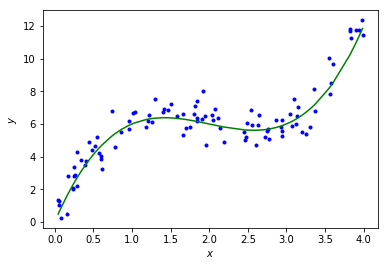

In [55]:
plt.plot(X, y, "b.")    # blue dots are the relationship with "irreducible error" added
plt.plot(X, f_X, "g-")  # green curve is the actual relationship between X and Y

plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()


Let's find a ridge regression model to predict Y from X using a set of basis functions as inputs.  

In [69]:
# first set of basis functions, the monomials
from sklearn.preprocessing import PolynomialFeatures

p = 10 # degree of poly we are using to approximation the true relationship with
poly = PolynomialFeatures(degree=p)

X_b = poly.fit_transform(X)   # create matrix of monomials up to degree 10

# next pick a value for lambda, the penalty parameter
lamb = 1

# then use formula for the model weights beta which minimize training pMSE
beta = np.linalg.inv(X_b.T.dot(X_b)+lamb*(np.identity(p+1))).dot(X_b.T).dot(y)
beta  # the model weights

array([[ 1.80297703],
       [ 3.15573587],
       [ 1.56779745],
       [ 0.29605651],
       [-0.53859851],
       [-0.71596422],
       [-0.07047864],
       [ 0.65184125],
       [-0.35130302],
       [ 0.07378269],
       [-0.00561285]])

In [72]:
# make a test dataset, also of size n

X_test = 4*np.random.rand(n, 1)                              # random.rand generates numbers in [0, 1) evenly
X_test.sort(axis=0) 
y_test = (X_test-2)*(X_test-1)*(X_test-3)+6 + np.random.normal(0, 0.75, size=(n, 1))

# compute test MSE
y_pred = poly.fit_transform(X_test).dot(beta)
test_MSE = (y_test-y_pred).T.dot(y_test-y_pred)/n

test_MSE

array([[0.72758416]])

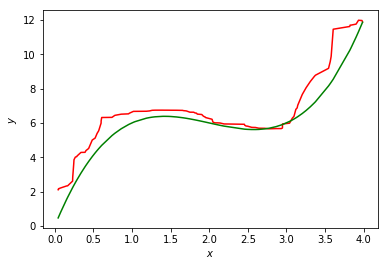

In [73]:
plt.plot(X, y_pred, "r-")    # red curve is the estimate of the relationship using degree 10 poly and lambda 1
plt.plot(X, f_X, "g-")  # green curve is the actual relationship between X and Y

plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

The red curve looks pretty bumpy.  Try choosing other values for lambda and see if you can get a better estimate.  What happens to the estimate and test MSE when you increase lambda? decrease lambda?  Which value of lambda do you recommend be used in the estimate?  What is the value of the test MSE for your lambda?